### Student Information
Name: 田雷西

Student ID: s1113535

GitHub ID: Thewo-6

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# Read the data into a dataframe
import pandas as pd

df = pd.read_csv(
    "newdataset/Reddit-stock-sentiment.csv",
    engine="python",
    quotechar='"',
    escapechar="\\",
    on_bad_lines="skip"
)

print(df.shape)
print(df.columns)
print(df.head(2))

(847, 16)
Index(['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url',
       'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity',
       'polarity', 'sentiment', 'entities', 'label'],
      dtype='object')
      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   

                                    url  upvotes  downvotes  upvote_ratio  \
0  https://i.redd.it/0yq2ftren8ue1.jpeg        0        NaN           NaN   
1  https://i.redd.it/7tl6puv9waue1.jpeg      -15        NaN           NaN   

                                                text  subjectivity  polarity  \
0                                   Ca

In [2]:
# Narrowing down to relevant columns
df = df[["title", "text", "label"]]

# Combining title and text into a single column
df["combined_text"] = df["title"].fillna('') + " " + df["text"].fillna('')
df = df[["combined_text", "label"]]

In [3]:
# Drop rows with missing values
df = df.dropna()

# Remove duplicate rows
df = df.drop_duplicates()

df[:10]

,combined_text,label
0,Retardation is on the menu boys! WSB is so bac...,-1.0
1,Retail giant TARGET has now declined for 10 co...,0.0
2,How do you feel about a sitting president maki...,0.0
3,Who knows more? $VMAR Vision Marine Technologi...,1.0
4,The Trump administration is begging Xi Jinping...,-1.0
5,Weekend Discussion Thread for the Weekend of A...,0.0
6,Is the market in complete denial right now? Tr...,-1.0
7,Retardation is on the menu boys! WSB is so bac...,0.0
8,"It's fucking awful seeing the ""Silver"" misinfo...",1.0
9,Any cheap stocks under $10? HLGN is $10. Hurry...,1.0


In [4]:
# Remove URLs from the text
import re

df["combined_text"] = df["combined_text"].apply(
    lambda x: re.sub(r"http\S+|www.\S+", "", x)
)

# Collapse multiple spaces into one
df["combined_text"] = df["combined_text"].apply(
    lambda x: re.sub(r"\s+", " ", x).strip()
)

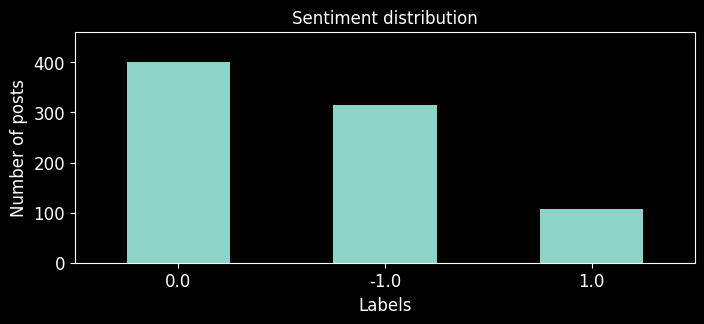

In [5]:
import matplotlib.pyplot as plt
#df.label.value_counts()

# plot barchart for X_sample
with plt.style.context('dark_background'):
    df.label.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, df.label.value_counts().max() + 60], 
                                           rot = 0, fontsize = 12, figsize = (8,3))
    plt.xlabel('Labels', fontsize = 12)
    plt.ylabel('Number of posts', fontsize = 12)
    plt.show()

In [6]:
# Tokenization
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maxal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Maxal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
import helpers.data_mining_helpers as dmh
df['unigrams'] = df['combined_text'].apply(lambda x: dmh.tokenize_text(x))

df[:5]["unigrams"]

0    [Retardation, is, on, the, menu, boys, !, WSB,...
1    [Retail, giant, TARGET, has, now, declined, fo...
2    [How, do, you, feel, about, a, sitting, presid...
3    [Who, knows, more, ?, $, VMAR, Vision, Marine,...
4    [The, Trump, administration, is, begging, Xi, ...
Name: unigrams, dtype: object

In [8]:
# Creating a Document-Term Matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.combined_text) # learn the vocabulary and return document-term matrix
print(df_counts.shape)

(824, 4506)


In [9]:
count_vect.get_feature_names_out()[3363]

'retardation'

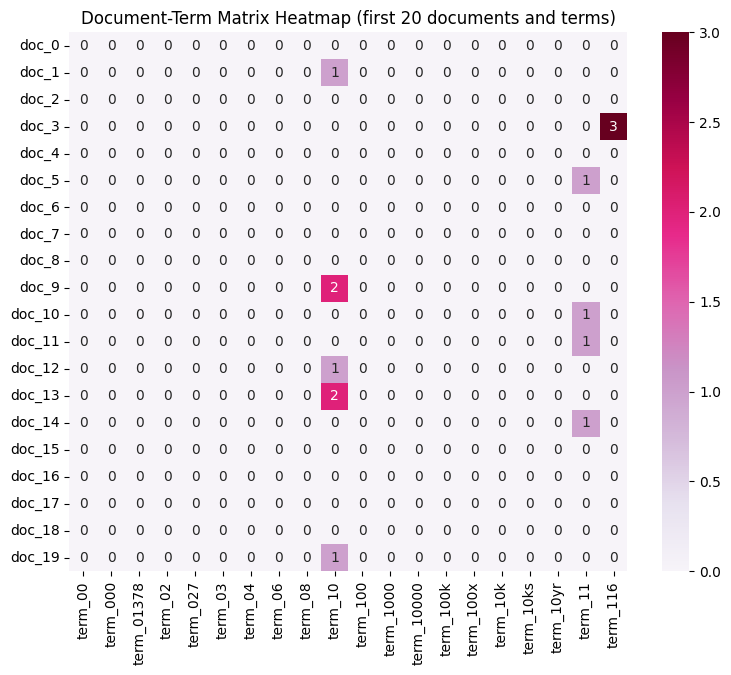

In [10]:
# Visualizing the Document-Term Matrix
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]] # build x axis labels
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:20]] # build y axis labels
plot_z = df_counts[0:20, 0:20].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y);
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax = df_todraw.values.max(), annot=True);
ax.set_title('Document-Term Matrix Heatmap (first 20 documents and terms)');
plt.show()

In [11]:
# Calculating Term Frequencies
import numpy as np

term_frequencies = []
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

In [12]:
# Visualizing the Top 50 Most Frequent Terms
import plotly.express as px
import math

# Get sorted indices in descending order of frequency
top_idx = np.argsort(term_frequencies)[::-1][:50]

# Get top terms and their frequencies
top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]
top_freqs_log = [math.log(i) for i in top_freqs]

df_top_50 = pd.DataFrame({"Term": top_terms, "Total frequency": top_freqs_log})

g = px.bar(
    df_top_50,
    x="Term",
    y="Total frequency",
    title="Top 50 Most Frequent Terms"
)
g.update_layout(xaxis_tickangle=-90, bargap=0.15, height=420, width=1000, xaxis_tickfont=dict(size=10))
#g.update_xaxes(tickmode='array', tickvals=list(range(0, 300, 10)), ticktext=count_vect.get_feature_names_out()[:300][::10])
g.show()

# Phase 2

In [13]:
# Preparing for pattern mining
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create separate DataFrames for each category
categories = df['label'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = df[df['label'] == category].copy()

# Function to create document-term frequency DataFrame for each category
def create_document_term_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['combined_text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    document_term_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return document_term_df

# Create document-term frequency DataFrames for each category
filt_document_term_dfs = {}  # Dictionary to store document-term DataFrames for each category

for category in categories:
    filt_document_term_dfs[category] = create_document_term_df(category_dfs[category])

In [42]:
# Display the filtered DataFrame for one of the categories, feel free to change the number in the vector
category_number = 0  # You can change it from 0 to 2

# Map category values to names
category_names = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
category_name = category_names.get(categories[category_number], str(categories[category_number]))

print(f"Filtered Document-Term Frequency DataFrame for Category {category_name}:")
filt_document_term_dfs[categories[category_number]]

Filtered Document-Term Frequency DataFrame for Category Negative:


,000,02,03,08,10,100,1000,10000,11,12,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


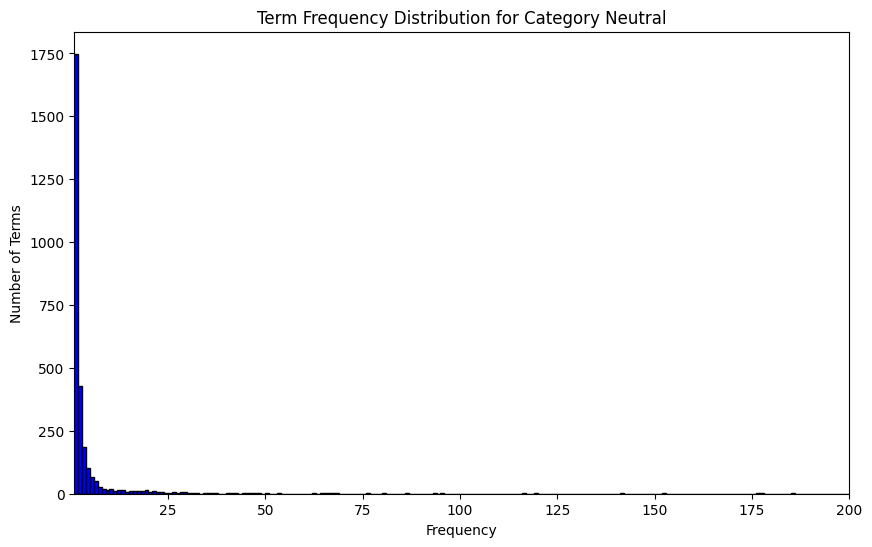

In [41]:
# Visualizing Term Frequency Distribution for a Category
import matplotlib.pyplot as plt

category_number = 1  # You can change it from 0 to 2

# Map category values to names
category_names = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}
category_name = category_names.get(categories[category_number], str(categories[category_number]))

word_counts = filt_document_term_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins='fd', color='blue', edgecolor='black') # Freedman-Diaconis rule for bin width
plt.title(f'Term Frequency Distribution for Category {category_name}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [36]:
# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(document_term_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = document_term_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}')
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}')
    # Return the DataFrame without the filtered words
    return document_term_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
document_term_dfs = {}
category_names = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}

for category in categories:
    cat_name = category_names.get(category, str(category))
    print(f'\nFor category {cat_name} we filter the following words:')
    document_term_dfs[category] = filter_top_bottom_words_by_sum(filt_document_term_dfs[category])



For category Negative we filter the following words:
Bottom 1.0% words: 
words           1
works           1
wobbling        1
woefully        1
woke            1
wonders         1
1934            1
1947            1
mostly          1
none            1
nonsense        1
nooo            1
nope            1
worthless       1
wouldn          1
word            1
name            1
motherfucker    1
movements       1
mspr            1
multiply        1
murica          1
dtype: int64
Top 5.0% words: 
right        21
than         21
crashing     21
would        21
data         21
           ... 
trump       201
and         222
is          257
to          337
the         560
Length: 114, dtype: int64

For category Neutral we filter the following words:
Bottom 1.0% words: 
1k              1
policies        1
politicians     1
worked          1
pop             1
works           1
popping         1
worry           1
portion         1
possesses       1
posted          1
potato          1
wrestlema

In [39]:
# Display an example of the filtered DataFrame for one category
category_number = 2  # You can change it from 0 to 2

# Map category values to names
category_names = {-1.0: 'Negative', 0.0: 'Neutral', 1.0: 'Positive'}

display_category_name = category_names.get(categories[category_number], str(categories[category_number]))
print(f"Filtered document-term Frequency DataFrame for Category {display_category_name}:")
document_term_dfs[categories[category_number]]


Filtered document-term Frequency DataFrame for Category Positive:


,04,06,10,100,116,12,125,14,145,153,...,yelling,yes,yesterday,yields,yikes,yolo,yoshitsu,your,ytd,zero
0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
